In [122]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [124]:

# Load Dataset
df = pd.read_excel("road_accident_data.xlsx")
print("Accident Data Preview: \n")
print(df.head())


Accident Data Preview: 

    Time Day_of_Week Age_band_of_driver Sex_of_driver Driving_experience  \
0  08:30      Monday              18-30          Male              1-2yr   
1  14:15   Wednesday              31-50        Female             5-10yr   
2  18:45      Friday              18-30          Male              3-5yr   
3  22:10      Sunday           Above 51          Male         Above 10yr   
4  07:50     Tuesday              18-30        Female              1-2yr   

  Type_of_vehicle Road_surface_conditions Weather_conditions  \
0             Car                     Dry              Clear   
1      Motorcycle                     Wet              Rainy   
2           Truck                     Dry              Foggy   
3             Bus                     Wet              Clear   
4             Car                     Dry             Cloudy   

  Type_of_collision  Number_of_vehicles_involved  Number_of_casualties  \
0          Rear-end                            2           

In [149]:

# Data Info
print("\nData Info:\n")
print(df.info())
print("\nMissing Values:\n")
print(df.isnull().sum())



Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         5 non-null      int32
 1   Day_of_Week                  5 non-null      int32
 2   Age_band_of_driver           5 non-null      int32
 3   Sex_of_driver                5 non-null      int32
 4   Driving_experience           5 non-null      int32
 5   Type_of_vehicle              5 non-null      int32
 6   Road_surface_conditions      5 non-null      int32
 7   Weather_conditions           5 non-null      int32
 8   Type_of_collision            5 non-null      int32
 9   Number_of_vehicles_involved  5 non-null      int64
 10  Number_of_casualties         5 non-null      int64
 11  Cause_of_Accident            5 non-null      int32
 12  Accident_Severity            5 non-null      int32
dtypes: int32(11), int64(2)
memory usage: 432.

In [157]:
df.head()

,Time,Day_of_Week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Road_surface_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Cause_of_Accident,Accident_Severity
0,1,1,0,1,0,1,0,0,1,2,1,3,1
1,2,4,1,0,2,2,1,3,2,3,2,0,2
2,3,0,0,1,1,3,0,2,0,2,3,2,0
3,4,2,2,1,3,0,1,0,1,4,4,1,1
4,0,3,0,0,0,1,0,1,2,2,1,3,1


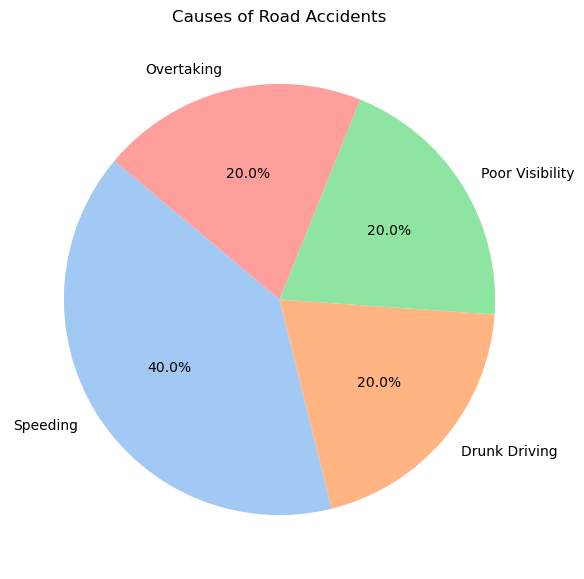

In [128]:

# Visualizing Causes of Road Accidents
cause_counts = df["Cause_of_Accident"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Causes of Road Accidents")
plt.show()


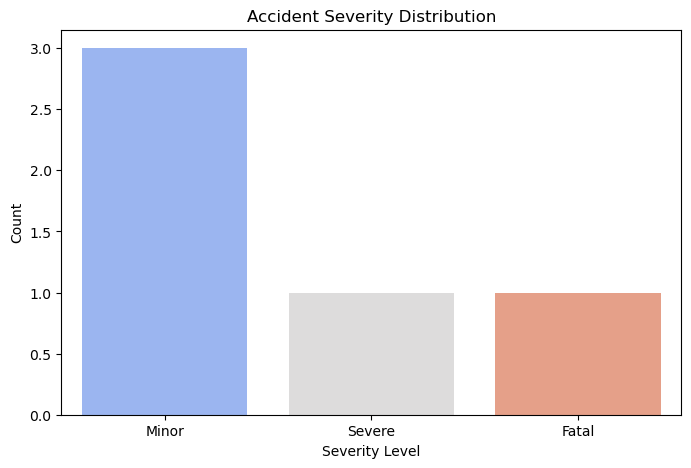

In [130]:

# Accident Severity Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Accident_Severity", hue="Accident_Severity", palette="coolwarm")
plt.title("Accident Severity Distribution") 
plt.xlabel("Severity Level") 
plt.ylabel("Count") 
plt.show()

# Data Preprocessing
df.dropna(inplace=True)  # Remove missing values


In [131]:

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting data into features and target
X = df.drop(columns=['Accident_Severity'])  # Features
y = df['Accident_Severity']  # Target variable

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           1       0.00      1.00      0.00       0.0
           2       1.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0


Confusion Matrix:
 [[0 0]
 [1 0]]


<function matplotlib.pyplot.show(close=None, block=None)>

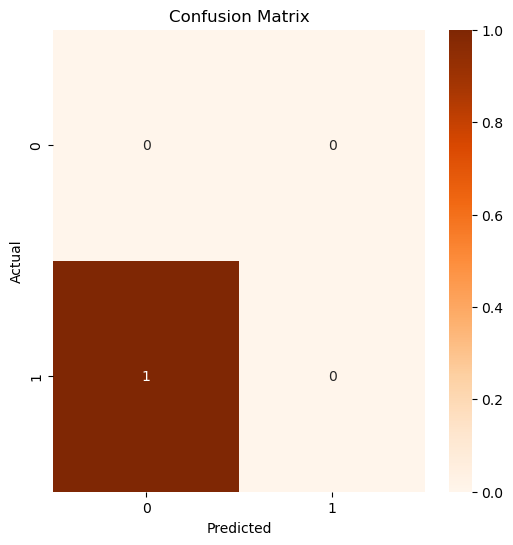

In [173]:

# Confusion Matrix Visualization
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show

In [175]:
()

# Prediction Function
def predict_severity(new_data):
    new_data = pd.DataFrame(new_data, columns=X.columns)  # Ensure correct format
    new_data = scaler.transform(new_data)  # Apply scaling
    prediction = model.predict(new_data)
    return prediction



Predicted Accident Severity: [1]


C:\Users\DELL\AppData\Local\Temp\ipykernel_2900\3744702859.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Actual", "Predicted"], y=[y_test.iloc[0], predicted_severity[0]], palette="coolwarm")


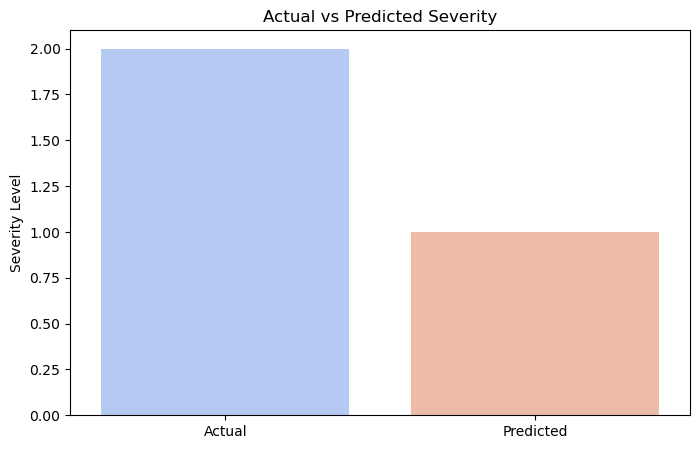

In [177]:

# Example Usage
sample_data = [X.iloc[0].values]  # Using first row of X as a sample
predicted_severity = predict_severity(sample_data)
print("Predicted Accident Severity:", predicted_severity)

# Visualization of Prediction Results
plt.figure(figsize=(8,5))
sns.barplot(x=["Actual", "Predicted"], y=[y_test.iloc[0], predicted_severity[0]], palette="coolwarm")
plt.title("Actual vs Predicted Severity")
plt.ylabel("Severity Level")
plt.show()